In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.interpolate import UnivariateSpline
from sklearn import linear_model
import xgboost as xgb
from ultis import *
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def create_lagging(df, df_original, i):
    df1 = df_original.copy()
    df1['time_interval_begin'] = df1['time_interval_begin'] + pd.DateOffset(minutes=i * 2)
    df1 = df1.rename(columns={'travel_time': 'lagging' + str(i)})
    df2 = pd.merge(df, df1[['link_ID', 'time_interval_begin', 'lagging' + str(i)]],on=['link_ID', 'time_interval_begin'],how='left')
    return df2

df = pd.read_csv('data/com_training.txt', delimiter=';', parse_dates=['time_interval_begin'], dtype={'link_ID': object})
df1 = create_lagging(df, df, 1)
for i in range(2, 6):
    df1 = create_lagging(df1, df, i)

link_infos = pd.read_csv('raw/gy_contest_link_info.txt', delimiter=';', dtype={'link_ID': object})
link_tops = pd.read_csv('raw/gy_contest_link_top.txt', delimiter=';', dtype={'link_ID': object})
link_tops['in_links'] = link_tops['in_links'].str.len().apply(lambda x: np.floor(x / 19))
link_tops['out_links'] = link_tops['out_links'].str.len().apply(lambda x: np.floor(x / 19))
link_tops = link_tops.fillna(0)
link_infos = pd.merge(link_infos, link_tops, on=['link_ID'], how='left')
# link_infos['links_num'] = link_infos["in_links"].astype('str') + "," + link_infos["out_links"].astype('str')
link_infos['area'] = link_infos['length'] * link_infos['width']
# df2=link_infos[['link_ID', 'length', 'width', 'links_num', 'area']]
df2 = pd.merge(df1, link_infos[['link_ID', 'length', 'width', 'in_links','out_links', 'area']], on=['link_ID'], how='left')

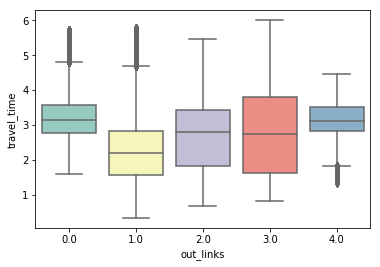

In [19]:
# df2.boxplot(by=['width'], column='travel_time')
# plt.show()
# fig,axes=plt.subplots(1,2,sharey=True)
# sns.boxplot(x="length",y="travel_time",data=df2,palette="Set3")
# plt.show()
# sns.violinplot(x="width",y="travel_time",data=df2)
# plt.show()
# df2.boxplot(by=['length'], column='travel_time')
# plt.show()

# links_num feature
# df2.loc[df2['links_num'].isin(['0.0,2.0', '2.0,0.0', '1.0,0.0']), 'links_num'] = 'other'
# df2.boxplot(by=['links_num'], column='travel_time')
sns.boxplot(x="out_links",y="travel_time",data=df2,palette="Set3")
plt.show()

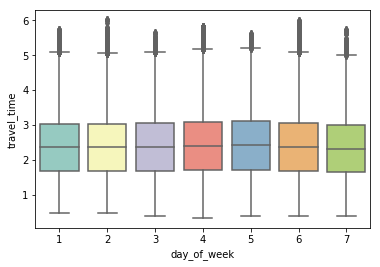

In [20]:
df2['day_of_week'] = df2['time_interval_begin'].map(lambda x: x.weekday() + 1)
sns.boxplot(x="day_of_week",y="travel_time",data=df2,palette="Set3")
plt.show()

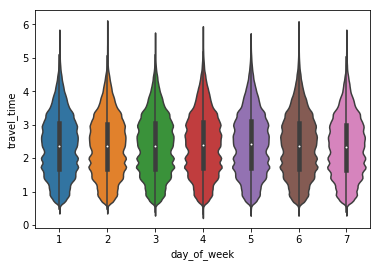

In [21]:
sns.violinplot(x="day_of_week",y="travel_time",data=df2)
plt.show()

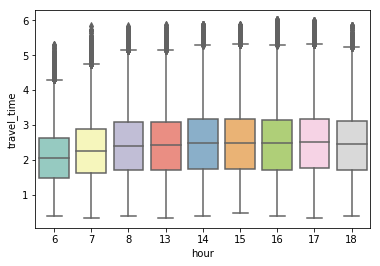

In [22]:
df2['hour'] = df['time_interval_begin'].dt.hour
sns.boxplot(x="hour",y="travel_time",data=df2,palette="Set3")
plt.show()

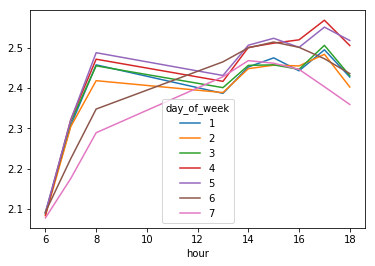

In [23]:
df2.groupby(['hour', 'day_of_week'])['travel_time'].mean().unstack().plot()
plt.show()

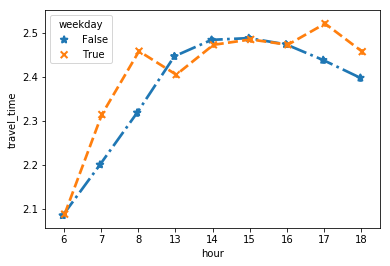

In [25]:
df2.loc[df2['day_of_week'].isin([1, 2, 3,4,5]), 'weekday'] = True
# df2.loc[df2['day_of_week'].isin([4, 5]), 'day_of_week_en'] = 2
df2.loc[df2['day_of_week'].isin([6, 7]), 'weekday'] = False
sns.pointplot(x="hour",y="travel_time",data=df2,hue="weekday",dodge=True,markers=["*","x"],linestyles=["-.","--"])
plt.show()